### Working with Strings and Regex

The file `emergency.csv` contains a random sample of 10,000 narratives of injuries treated in U.S. emergency departments. We will try to extract some structured data from these narratives.

**a) Length of Narratives**<br>
_Read in the data. Find and display the longest and shortest description._<br>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read in the data and record row as a data row and not a header row.
df=pd.read_csv('emergency.csv',header = None,names=['narratives'])
df.head()

,narratives
0,10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED...
1,75YOF WITH LAC TO FINGER FROM METAL CAN
2,8YOF FRACTURED FINGER FELL OFF HER BIKE
3,9 YOM TACKLED DURING FOOTBALL PRACTICE. DX: C...
4,PT WAS HIT ON RT SIDE WHILE PLAYING FOOTBALL D...


In [3]:
# Now we get the ideal shape of df with the 10,000 rows.
df.shape

(10000, 1)

In [4]:
# Create a column called "length" which shows the length of characters in each line of narrative. 
df['length']=df['narratives'].apply(lambda t: len(t))

# Create a column called "num_words" which shows the number of words in each narrative.
df['num_words']=df['narratives'].apply(lambda t : len(str(t).split())) 

df.head()

,narratives,length,num_words
0,10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED...,53,10
1,75YOF WITH LAC TO FINGER FROM METAL CAN,40,8
2,8YOF FRACTURED FINGER FELL OFF HER BIKE,40,7
3,9 YOM TACKLED DURING FOOTBALL PRACTICE. DX: C...,57,8
4,PT WAS HIT ON RT SIDE WHILE PLAYING FOOTBALL D...,52,11


In [5]:
# Sort the order by the "length", find the longest description.
df.sort_values(by='length',ascending=False).head()

,narratives,length,num_words
5811,DX SYNCOPE/PROLONGED QT/CHEST PN: 49YOF COMPET...,143,22
511,19MOWF PARENTS HOLDING PT. DAD STATES SHE WA...,143,28
4322,"AT HOUSE- FELL ONTO BACK OF HIS HEAD, WHILE ...",143,25
6493,"21MOF IN LIVING ROOM,FOUND W/BURN THUMB,OTTOMA...",143,24
4791,"79 YO F, C/O RT SHOULDER, FACIAL PAIN, WAS WAL...",143,24


In [6]:
# Select and display the description with the longest description.
df[df['length']==143]

,narratives,length,num_words
109,40YOM-C/O FOOT/HEEL PAIN RUNNIJNG BACKWARDS FE...,143,22
511,19MOWF PARENTS HOLDING PT. DAD STATES SHE WA...,143,28
630,44YOF PT HAVING SEVERE R ARM PAIN THAT IS RAD...,143,25
920,57 YO F WAS POURING KEROSENE OVER AN OPEN FLAM...,143,29
1111,"13YOM DID OUTDOOR WORKOUT X1 1/2 HRS, DEVELOEP...",143,21
...,...,...,...
9370,"20 YO M, RUNNING FROM POLICE AFTER AN ALLEGED ...",143,26
9666,22YOM WAS LIGHTING PROPANE PIZZA OVEN ON FRI. ...,143,26
9670,45YOWM TONIGHT PT WAS TRYING TO MOVE HIS FATH...,143,25
9749,"PT.INJ.NOSE,HAND,WRIST,ELBOW WHEN RIDING BIKE ...",143,19


In [7]:
# Sort the order by the "length", find the shortest description.
df.sort_values(by='length',ascending=True).head()

,narratives,length,num_words
7731,INGESTION OF ***,17,3
7127,ABR HIP ON FLOOR,17,4
4357,FX TIBIA- FELL BED,19,4
5365,FAN FALL ON PT. HI,19,5
5342,H'TMA HEAD ON SINK,19,4


In [8]:
# Select and display the description with the shortest description.
df[df['length']==17]

,narratives,length,num_words
7127,ABR HIP ON FLOOR,17,4
7731,INGESTION OF ***,17,3


**b) Fractures**<br>
Find all narratives related to "fractures". Try to include singular/plural/verb forms in your search. Also, FX is the medical abbreviation for fracture, so include that as well. How many fracture narratives can you find?<br>


In [9]:
# Use a RegEx format to helps including multiple forms of the word "Fracture" and "FX" as well:
## 'fracture', 'fractured', 'fractures', other versions with upper case as well.

import re

In [10]:
# Since the word text are all written in upper case, we can express the syntax all in upper case as well.
fracture_related=[text for text in df['narratives'] if re.search(r'(\bFRACTUR(E|ES|ED|ING)|\bFX\b)',text)]
fracture_related[:5]

['10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED SKULL ',
 '8YOF FRACTURED FINGER FELL OFF HER BIKE ',
 '12YOF FELL DOWN STAIRS DX: FX RADIUS',
 '77 Y MALE HAD MECHANICAL FALL DOWN STEPS CAUSING ANKLE INJ DX; ANKLE FX',
 '34YOM-FELL DOWN INDOOR STEPS @ HOME CARRYING A DOG,TRIPPED ON SOMETHING -FELL FORWARD     DX FX DISTAL TIBIA & FIBULA']

In [11]:
# Show the number of fracture narritives we can find.
len(fracture_related)

1470

**c) Body Parts**<br>
Among the fracture narratives, try to identify the body parts that are fractured (Note: Don't go overboard. A selection of parts is sufficient.). Make a histogram of fractured body parts (but make sure plural and singular forms are combined.)

In [12]:
# Join all the narratives into one long string and extract the body parts from this long string.
fractures=" ".join(fracture_related)
fractures[:100]

'10 MO F FELL OUT OF SHOPPING CART;DX FRACTURED SKULL  8YOF FRACTURED FINGER FELL OFF HER BIKE  12YOF'

In [13]:
# Clean up the punctuation 
fractures=re.sub(r'[^a-zA-Z0-9]+',' ',fractures)

In [14]:
# Apply word tokenize from NLTK. Check the distribution of the wanted body parts.
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [15]:
# Creat a dataframe that contains the word tokenized from the long string,
# and calculate the frequency.
tokens=nltk.word_tokenize(str(fractures))
fqd=FreqDist(tokens)
df_fdist = pd.DataFrame.from_dict(fqd,orient='index')
df_fdist.reset_index(inplace=True)
df_fdist.rename(columns={'index':'token',0:'frequency'},inplace= True)
df_fdist.sort_values(by='frequency',ascending=False,inplace=True)

df_fdist.head()

,token,frequency
19,FX,984
3,FELL,762
8,DX,750
38,ON,459
70,AND,412


In [16]:
# Find the relative parts that are associated with fracture.
body_parts=df_fdist.loc[df_fdist['token'].isin(['FINGER', 'SKULL', 'ANKLE', 'RIB', 'TOE', 'WRIST', 'SPINE', 'NECK','LEG','FOOT','FEET','ARM','LUMBAR'])]
body_parts.head()

,token,frequency
12,FINGER,216
215,WRIST,186
29,ANKLE,174
149,ARM,140
295,FOOT,135


Text(0.5, 1.0, 'Distribution of Body Parts Under Fracture')

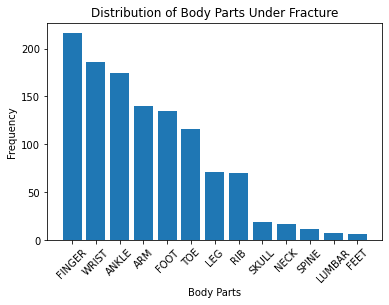

In [17]:
# Draw histogram showing distribution for different body parts with most fractures.
import matplotlib.pyplot as plt

plt.bar(x=body_parts['token'],height=body_parts['frequency'])
plt.xticks(rotation=45)

plt.xlabel('Body Parts')
plt.ylabel('Frequency')
plt.title('Distribution of Body Parts Under Fracture')

**d) Age and Gender**<br>
Let's try to extract age and gender. In a number of narratives you may have noticed a pattern:

- "75 YOM, FELL DOWN STAIRS, FRACTURE LEG": A 75 year old male.
- "21MOF FINGER SHUT IN WINDOW AT HOME;NAILBED INJURY: A 21 month-old female child.
- "DX:AVULSION OF SKIN-50YOF-CUT THUMB WITH SCISSORS TONIGHT-OPENING A BOX": A 50 year old female.
- "LEFT ELBOW CONTUSION,RT SHIN LAC.PT WAS ICE SKATING AND FELL.": No information about age or gender.<br>

You are generally looking for a pattern with a number (age), something to indicate the units, e.g. YO or YR for years old, or MO for months old, and a character that identifies the gender. So, I suggest to think of a pattern that combines these three parts.<br>

Create variables for age and gender (make sure to convert months to years when necessary). How many men and women are in the data? Provide a line graph of the number of injuries (y-axis) vs age (x-axis) disaggregated by gender.

In [18]:
# Create the Regex pattern about age and gender information.
pattern=re.compile(r'(\d{2}).?(Y|M).*?(M|F)')

In [19]:
# Use regex group to get the information about age and gender.
age_gender = [match.group(1,2,3) for match in [re.search(pattern, text) for text in df['narratives']] if match]
info_df = pd.DataFrame(age_gender)
info_df.head()

,0,1,2
0,10,M,F
1,75,Y,F
2,12,Y,F
3,50,Y,F
4,21,M,M


In [20]:
# Add the name of columns and change the type of it.
info_df.rename(columns={0:'raw',1:'type',2:'gender'},inplace=True)
info_df['raw']=info_df['raw'].astype(float)
info_df[['type','gender']]=info_df[['type','gender']].astype(str)

In [21]:
# Convert age in months to years for future calculation.
info_df["year"]=[round((float(info_df.iloc[i, 0])/12),2)  if info_df.iloc[i, 1]=="M" else info_df.iloc[i, 0] for i in range(len(info_df["raw"]))]
info_df.head()

,raw,type,gender,year
0,10.0,M,F,0.83
1,75.0,Y,F,75.00
2,12.0,Y,F,12.00
3,50.0,Y,F,50.00
4,21.0,M,M,1.75


In [24]:
# Calculate the number of male and femals.
info_df['gender'].value_counts()

M    3657
F    3121
Name: gender, dtype: int64

In [30]:
# Group the number of injuries for differet gender.
info_vf=info_df.groupby(by=['gender','year']).count().reset_index(

,gender,year,raw,type
0,F,0.00,2,2
1,F,0.83,15,15
2,F,0.92,17,17
3,F,1.00,18,18
4,F,1.08,12,12
...,...,...,...,...
260,M,94.00,2,2
261,M,95.00,1,1
262,M,96.00,1,1
263,M,97.00,1,1


[Text(0.5, 1.0, 'Emergency Plot'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Numbers')]

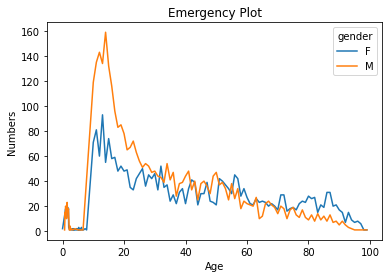

In [34]:
import seaborn as sns
ans=sns.lineplot(x='year',y='raw',data=info_vf,hue='gender')
ans.set(title = "Emergency Plot", xlabel = "Age", ylabel = "Numbers")

### Optional (Bonus): Regex Crossword
  Let's have a bit of fun with some regex crossword puzzle.

_**Inference:**_
1. D or N
2. O
3. E or N 
4. T
5. A or P
6. A or C
7. N
8. I 
9. A or N or C

_**Answer:**_
DONTPANIC
